In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
import xgboost
import lightgbm as lgb

!pip install optuna
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt

In [150]:
import warnings
warnings.filterwarnings("ignore")

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
df = pd.read_csv("/content/drive/MyDrive/Electricity_bill_prediction  /finalinputs.csv")

In [153]:
df.shape

(12083, 24)

In [154]:
df.head()

,TYPEHUQ,HDD30YR,CDD30YR,BEDROOMS,NCOMBATH,TOTROOMS,CELLAR,GARGHEAT,HEATROOM,ACROOMS,USECENAC,TEMPNITEAC,TOTSQFT,TOTHSQFT,TOTCSQFT,KWH,KWHCOL,KWHRFG,KWHOTH,DOLELCOL,DOLELWTH,DOLELRFG,DOLELOTH,DOLLAREL
0,2,4953,1271,4,1,9,1,0,9,9,3,73,5075,3958,3958,18466,3068.80,1515.50,7726.55,218.54,211.39,107.92,550.22,1315
1,2,2688,143,3,2,4,0,0,4,4,1,-2,3136,2736,2736,5148,182.00,1310.22,3655.78,16.79,0.00,120.89,337.32,475
2,5,5741,829,1,1,2,-2,-2,2,-2,-2,-2,528,528,264,2218,184.46,915.66,1117.88,48.90,0.00,242.75,296.35,588
3,2,5781,868,3,2,7,0,0,7,7,3,68,2023,1623,1623,10015,1063.02,1670.53,5393.91,101.05,179.42,158.80,512.73,952
4,3,5313,797,2,1,5,1,-2,5,-2,-2,-2,1912,1274,0,2869,0.00,346.47,2522.53,0.00,0.00,85.14,619.86,705


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPEHUQ     12083 non-null  int64  
 1   HDD30YR     12083 non-null  int64  
 2   CDD30YR     12083 non-null  int64  
 3   BEDROOMS    12083 non-null  int64  
 4   NCOMBATH    12083 non-null  int64  
 5   TOTROOMS    12083 non-null  int64  
 6   CELLAR      12083 non-null  int64  
 7   GARGHEAT    12083 non-null  int64  
 8   HEATROOM    12083 non-null  int64  
 9   ACROOMS     12083 non-null  int64  
 10  USECENAC    12083 non-null  int64  
 11  TEMPNITEAC  12083 non-null  int64  
 12  TOTSQFT     12083 non-null  int64  
 13  TOTHSQFT    12083 non-null  int64  
 14  TOTCSQFT    12083 non-null  int64  
 15  KWH         12083 non-null  int64  
 16  KWHCOL      12083 non-null  float64
 17  KWHRFG      12083 non-null  float64
 18  KWHOTH      12083 non-null  float64
 19  DOLELCOL    12083 non-nul

In [156]:
df.describe()

,TYPEHUQ,HDD30YR,CDD30YR,BEDROOMS,NCOMBATH,TOTROOMS,CELLAR,GARGHEAT,HEATROOM,ACROOMS,USECENAC,TEMPNITEAC,TOTSQFT,TOTHSQFT,TOTCSQFT,KWH,KWHCOL,KWHRFG,KWHOTH,DOLELCOL,DOLELWTH,DOLELRFG,DOLELOTH,DOLLAREL
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,2.659604,4135.146983,1443.503104,2.773070,1.672101,5.995283,-0.081685,-1.161135,5.351568,2.929902,0.605148,31.106513,2172.352892,1675.956219,1254.239262,11288.159398,1685.269578,1243.170528,6299.519119,202.538365,119.612920,154.142547,767.102709,1351.783911
std,1.192627,2260.543686,1021.748722,1.217654,0.740713,2.178903,1.065492,1.019641,2.624559,4.230290,2.167944,37.361564,1453.742279,1200.819335,1227.949667,7641.190845,2479.141897,778.547873,4310.587198,309.986663,180.629181,106.279516,551.779542,905.031257
min,1.000000,0.000000,0.000000,-2.000000,0.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,100.000000,0.000000,0.000000,17.000000,0.000000,0.000000,9.590000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2224.000000,712.000000,2.000000,1.000000,5.000000,0.000000,-2.000000,4.000000,-2.000000,-2.000000,-2.000000,1087.500000,888.000000,264.000000,5837.000000,142.110000,722.945000,3208.615000,18.325000,0.000000,86.340000,396.225000,739.000000
50%,2.000000,4502.000000,1179.000000,3.000000,2.000000,6.000000,0.000000,-2.000000,5.000000,4.000000,1.000000,-2.000000,1863.000000,1400.000000,1025.000000,9623.000000,751.130000,1046.200000,5429.250000,89.760000,0.000000,126.990000,649.250000,1151.000000
75%,3.000000,5854.000000,1842.500000,3.000000,2.000000,7.000000,1.000000,0.000000,7.000000,6.000000,3.000000,72.000000,2816.000000,2160.000000,1830.000000,14765.000000,2290.780000,1561.660000,8317.445000,263.285000,225.525000,192.440000,990.620000,1732.000000
max,5.000000,13346.000000,5357.000000,13.000000,8.000000,23.000000,1.000000,1.000000,23.000000,23.000000,3.000000,96.000000,16122.000000,13776.000000,13776.000000,150254.000000,60995.430000,11069.030000,65056.750000,7729.270000,2155.260000,2490.050000,9213.060000,19040.000000


In [157]:
#from pandas_profiling import ProfileReport 

In [158]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

In [159]:
X = df.drop('DOLLAREL',axis=1)
y = df['DOLLAREL']

In [160]:
X.head()

,TYPEHUQ,HDD30YR,CDD30YR,BEDROOMS,NCOMBATH,TOTROOMS,CELLAR,GARGHEAT,HEATROOM,ACROOMS,USECENAC,TEMPNITEAC,TOTSQFT,TOTHSQFT,TOTCSQFT,KWH,KWHCOL,KWHRFG,KWHOTH,DOLELCOL,DOLELWTH,DOLELRFG,DOLELOTH
0,2,4953,1271,4,1,9,1,0,9,9,3,73,5075,3958,3958,18466,3068.80,1515.50,7726.55,218.54,211.39,107.92,550.22
1,2,2688,143,3,2,4,0,0,4,4,1,-2,3136,2736,2736,5148,182.00,1310.22,3655.78,16.79,0.00,120.89,337.32
2,5,5741,829,1,1,2,-2,-2,2,-2,-2,-2,528,528,264,2218,184.46,915.66,1117.88,48.90,0.00,242.75,296.35
3,2,5781,868,3,2,7,0,0,7,7,3,68,2023,1623,1623,10015,1063.02,1670.53,5393.91,101.05,179.42,158.80,512.73
4,3,5313,797,2,1,5,1,-2,5,-2,-2,-2,1912,1274,0,2869,0.00,346.47,2522.53,0.00,0.00,85.14,619.86


In [161]:
y.head()

0    1315
1     475
2     588
3     952
4     705
Name: DOLLAREL, dtype: int64

In [162]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1,random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [163]:
X_train.shape,X_val.shape,X_test.shape

((9786, 23), (1209, 23), (1088, 23))

In [164]:
def model_evaluate(y_train, y_test, y_pred, y_pred_train):
    metrics = {}
    #RMSE Test
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    #RMSE Train
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    #MAE Test
    mae_test = mean_absolute_error(y_test, y_pred)
    #MAE Train
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    #R2 score
    r2_test = r2_score(y_test,y_pred)
    r2_train = r2_score(y_train,y_pred_train)

    metrics = {
              'RMSE Test': rmse_test,
              'RMSE Train': rmse_train,
               'R2 Test' : r2_test,
               'R2 Train' : r2_train,
               'MAE Test': mae_test,
               'MAE Train' : mae_train
               }

    return metrics

### Random Forest 

In [55]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [56]:
model_evaluate(y_train,y_test,y_pred,y_pred_train)

{'MAE Test': 78.22181517241378,
 'MAE Train': 29.212682667297237,
 'R2 Test': 0.9764695361966228,
 'R2 Train': 0.9947817082180148,
 'RMSE Test': 131.7373797562722,
 'RMSE Train': 66.74656608894126}

In [57]:
y.value_counts(sort = False ,ascending=True)

0       2
2049    5
2057    3
2065    1
2073    2
       ..
2007    2
2023    3
4078    1
2031    1
2039    4
Name: DOLLAREL, Length: 3118, dtype: int64

In [ ]:
cv_method = StratifiedKFold(n_splits=10,shuffle=False,random_state=42)

In [ ]:
params_RF = {"min_samples_split": [2, 6, 20],
             "min_samples_leaf": [4,8,12],
             "n_estimators" :[100,150],
             "max_features" : ['auto', 'sqrt', 'log2'],
             'max_depth' : [x for x in range(8,20)]             
            }

In [ ]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                n_jobs=2,
                                )

In [ ]:
GridSearchCV_RF.fit(X_train, y_train)

In [ ]:
best_params_RF = GridSearchCV_RF.best_params_
best_params_RF
best_score_RF = GridSearchCV_RF.best_score_
best_score_RF

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)

In [ ]:
model_evaluate(y_train,y_test,y_pred,y_pred_train)

### XGboost

In [165]:
xgb = XGBRegressor(tree_method='gpu_hist')
xgb.fit(X_train,y_train)
y_pred_train = xgb.predict(X_train)
y_pred=xgb.predict(X_test)

[11:27:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


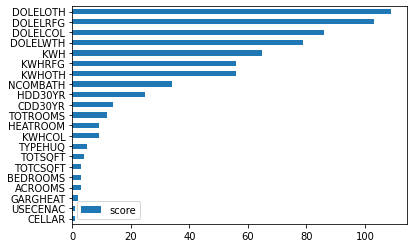

In [166]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
_=data.plot(kind='barh')


In [167]:
model_evaluate(y_train,y_test,y_pred,y_pred_train)

{'MAE Test': 95.81721026757184,
 'MAE Train': 76.91802920979418,
 'R2 Test': 0.9597651125402804,
 'R2 Train': 0.9834435522920235,
 'RMSE Test': 198.3972461339301,
 'RMSE Train': 116.13637701068679}

In [168]:
import pickle
filename = 'xgb.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [74]:
# load the model from disk
loaded_model = pickle.load(open('/content/drive/MyDrive/Electricity_bill_prediction  /rf.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

###XGBoost+Optuna

In [170]:
dtrain = xgboost.DMatrix(X_train, label=y_train)
dval = xgboost.DMatrix(X_val, label=y_val)
dtest = xgboost.DMatrix(X_test, label=y_test)

In [171]:
def get_model_rmse(params):
    model = xgboost.train(params, dtrain, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds=10, verbose_eval=0)
    results = model.eval(dval)
    rmse = np.float(re.search(r'[\d.]+$', results).group(0))
    return rmse

In [172]:
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 0.00001, 10.0)
    max_depth = trial.suggest_int('max_depth', 4, 8)
    l1_reg = trial.suggest_loguniform('l1_reg', 0.00001, 10.0)
    l2_reg = trial.suggest_loguniform('l2_reg', 0.00001, 10.0)
    
    params = {'learning_rate': learning_rate, 'max_depth': max_depth, 'alpha': l1_reg, 'lambda': l2_reg}
    
    return get_model_rmse(params)

In [173]:
study = optuna.create_study()
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2021-06-23 11:28:51,025] A new study created in memory with name: no-name-a8e77944-bd86-4583-912e-ea0a9496dd88


[I 2021-06-23 11:28:52,619] Trial 0 finished with value: 103.472572 and parameters: {'learning_rate': 0.3201489426758206, 'max_depth': 5, 'l1_reg': 0.20569759293053336, 'l2_reg': 1.717873828065727}. Best is trial 0 with value: 103.472572.
[I 2021-06-23 11:28:52,847] Trial 1 finished with value: 40941648.0 and parameters: {'learning_rate': 3.5647910638435483, 'max_depth': 8, 'l1_reg': 0.00014241576489534827, 'l2_reg': 5.599983808377355}. Best is trial 0 with value: 103.472572.
[I 2021-06-23 11:28:53,970] Trial 2 finished with value: 126.092209 and parameters: {'learning_rate': 0.10368459345742133, 'max_depth': 4, 'l1_reg': 0.01631283802734638, 'l2_reg': 2.6436628681856975}. Best is trial 0 with value: 103.472572.
[I 2021-06-23 11:28:55,681] Trial 3 finished with value: 1357.571533 and parameters: {'learning_rate': 0.0017180200585062123, 'max_depth': 6, 'l1_reg': 0.0032450138311055613, 'l2_reg': 3.942560601046058}. Best is trial 0 with value: 103.472572.
[I 2021-06-23 11:28:56,860] Trial

In [174]:
best_params=study.best_params
best_params

{'l1_reg': 0.25538014350100363,
 'l2_reg': 0.00010465731482823709,
 'learning_rate': 0.15129162180672923,
 'max_depth': 5}

In [175]:
XGB_model = xgboost.train(best_params,dtrain=dtrain,num_boost_round=350,evals=[(dval,'eval')],early_stopping_rounds=10)

[0]	eval-rmse:1369.85
Will train until eval-rmse hasn't improved in 10 rounds.
[1]	eval-rmse:1168.83
[2]	eval-rmse:996.906
[3]	eval-rmse:854.517
[4]	eval-rmse:735.179
[5]	eval-rmse:629.579
[6]	eval-rmse:541.897
[7]	eval-rmse:469.151
[8]	eval-rmse:408.362
[9]	eval-rmse:356.487
[10]	eval-rmse:314.406
[11]	eval-rmse:278.254
[12]	eval-rmse:250.261
[13]	eval-rmse:227.48
[14]	eval-rmse:208.905
[15]	eval-rmse:193.24
[16]	eval-rmse:181.203
[17]	eval-rmse:172.001
[18]	eval-rmse:164.709
[19]	eval-rmse:158.881
[20]	eval-rmse:154.504
[21]	eval-rmse:151.423
[22]	eval-rmse:148.585
[23]	eval-rmse:145.89
[24]	eval-rmse:143.834
[25]	eval-rmse:142.839
[26]	eval-rmse:141.382
[27]	eval-rmse:140.16
[28]	eval-rmse:139.339
[29]	eval-rmse:138.5
[30]	eval-rmse:137.869
[31]	eval-rmse:137.218
[32]	eval-rmse:136.544
[33]	eval-rmse:136.373
[34]	eval-rmse:135.932
[35]	eval-rmse:134.466
[36]	eval-rmse:133.439
[37]	eval-rmse:133.243
[38]	eval-rmse:132.762
[39]	eval-rmse:132.323
[40]	eval-rmse:131.665
[41]	eval-rmse:1

In [180]:
y_train= np.array(y_train)
y_pred_train = np.array(XGB_model.predict(dtrain))

In [181]:
y_val = np.array(y_val)
y_pred_val = np.array(XGB_model.predict(dval))

In [182]:
y_true = np.array(y_test)
y_pred = np.array(XGB_model.predict(dtest))

In [183]:
r2 = r2_score(y_true, y_pred)
rmsc = np.sqrt(mean_squared_error(y_true,y_pred))
r2_train = r2_score(y_train,y_pred_train)
rmsc_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
r2_val = r2_score(y_val,y_pred_val)
rmsc_val = np.sqrt(mean_squared_error(y_val,y_pred_val))
print("R^2 Score : {:.4f}".format(r2_train))
print("RMSE Train: {:.4f}".format(rmsc_train))
print("R^2 Score : {:.4f}".format(r2_val))
print("RMSE val: {:.4f}".format(rmsc_val))
print("R^2 Score : {:.4f}".format(r2))
print("RMSE Test: {:.4f}".format(rmsc))


R^2 Score : 0.9994
RMSE Train: 21.7427
R^2 Score : 0.9891
RMSE val: 87.8813
R^2 Score : 0.9911
RMSE Test: 93.2806


In [37]:
import pickle
filename = 'xgb_Optuna.pkl'
pickle.dump(XGB_model, open(filename, 'wb'))

### lightGBM+Optuna 

In [117]:
def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_val, label=y_val)
    dtest = lgb.Dataset(X_test,label=y_test)

    param = {
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "rmse")
    gbm = lgb.train(
        param, dtrain, valid_sets=[dvalid], verbose_eval=False, callbacks=[pruning_callback]
    )

    preds = gbm.predict(X_val)
    RMSE = np.sqrt(mean_squared_error(y_val,preds))
    return RMSE

In [ ]:
study1 = optuna.create_study()
study1.optimize(objective, n_trials=100, show_progress_bar=True)

In [119]:
best_params=study1.best_params
best_params

{'bagging_fraction': 0.9703729261124453,
 'bagging_freq': 2,
 'min_child_samples': 60}

In [122]:
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_val, label=y_val)
dtest = lgb.Dataset(X_test,label=y_test)
gbm_model = lgb.train(
        best_params, dtrain, valid_sets=[dvalid], verbose_eval=False
    )

In [130]:
preds = gbm_model.predict(X_val)
rmsc_val = np.sqrt(mean_squared_error(y_val,preds))
r2_val = r2_score(y_val,preds)

preds_test = gbm_model.predict(X_test)
r2_test = r2_score(y_test,preds_test)
rmsc_test = np.sqrt(mean_squared_error(y_test,preds_test))

print("R^2 Score : {:.4f}".format(r2_val))
print("RMSE val: {:.4f}".format(rmsc_val))
print("R^2 Score : {:.4f}".format(r2_test))
print("RMSE Test: {:.4f}".format(rmsc_test))


R^2 Score : 0.9808
RMSE val: 116.7426
R^2 Score : 0.9468
RMSE Test: 228.1812


In [131]:
filename = 'LightGBM_Optuna.pkl'
pickle.dump(gbm_model, open(filename, 'wb'))